# Steps
    1. Importing necessary libraries
    2. Data Understanding 
        - Load the Dataset
    3. EDA
        - Univariate Analysis
        - Bivariate Analysis
        - Multivariate Analysis
    4. Data Preprocessing
        - Convert Numeric Encoded Categorical Variables
        - Drop Unnecessary Columns
        - Convert Categorical Variables to Dummy Variables
    5. Feature Scaling
    6. Split the Dataset
        - Separate Features and Target Variable
        - Train-Test Split
    7. Model Building
        - Initialize and Train Models
    8. Model Evaluation
        - Make Predictions on Test Set
        - Evaluate Models Using R-squared
    9. Residual Analysis
        - Plot Residuals to Check Model Assumptions
    10. Interpretation
        - Coefficients for Linear Regression
        - Feature Importances for Random Forest
    11. Business Insights & Conclusion

# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


# Data Preparation:

    You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
     
    You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

 

# Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


# Model Evaluation
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

 

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

 

    where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
    Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

# 1. Importing necessary libraries

In [5]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Data Splitting and Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluation
from sklearn.metrics import r2_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Understanding 

In [7]:
# Load the dataset
df = pd.read_csv('day.csv')

In [8]:
# Get rows and columns
df.shape

(730, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
# fetch few values from dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [14]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [15]:
# There are no missing values, no need to impute or process the data

In [16]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [17]:
# Create mappings for weather and season
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Apply mappings
df['weathersit'] = df['weathersit'].map(weather_mapping)
df['season'] = df['season'].map(season_mapping)

# Convert 'yr' to a categorical column
df['yr'] = df['yr'].map({0: '2018', 1: '2019'})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.4+ KB


In [19]:
df.shape

(730, 16)

# 3. EDA

### Univariate Analysis

In [22]:
num_cols=['temp','hum','windspeed']
cat_cols = ['weathersit','yr','season']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


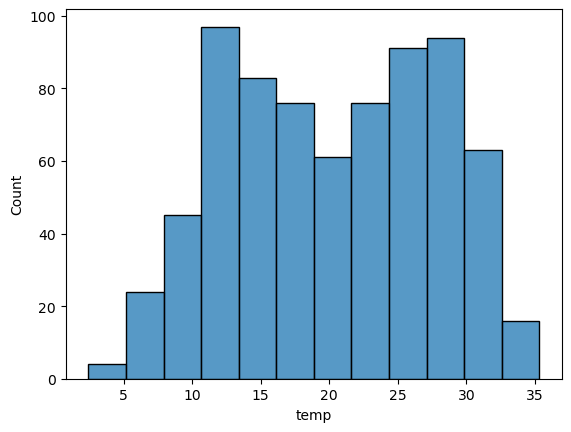

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


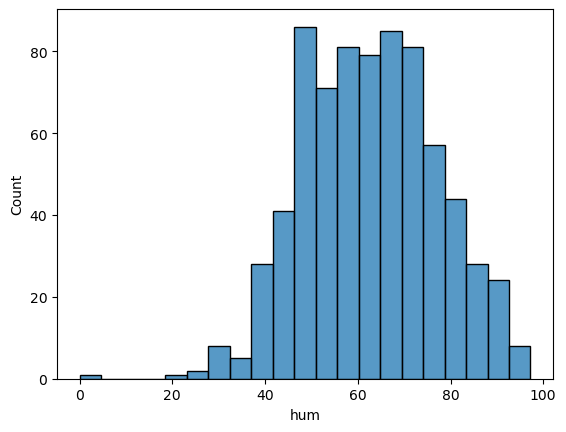

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


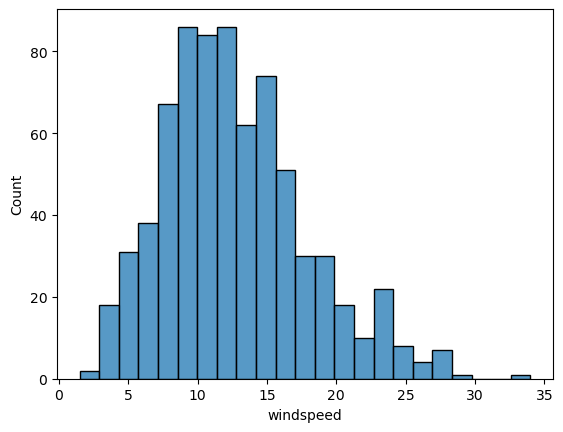

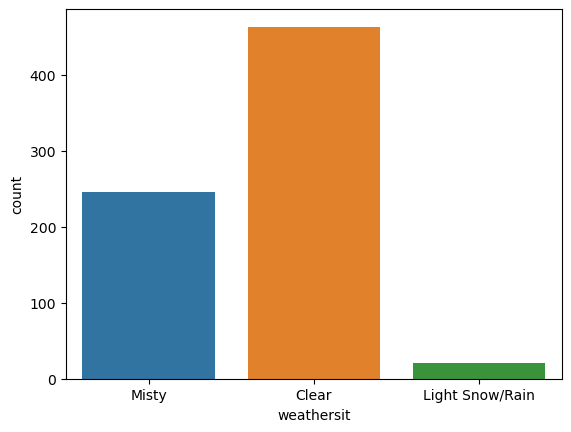

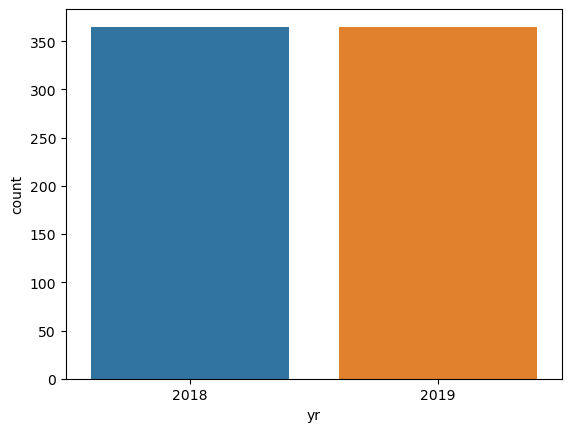

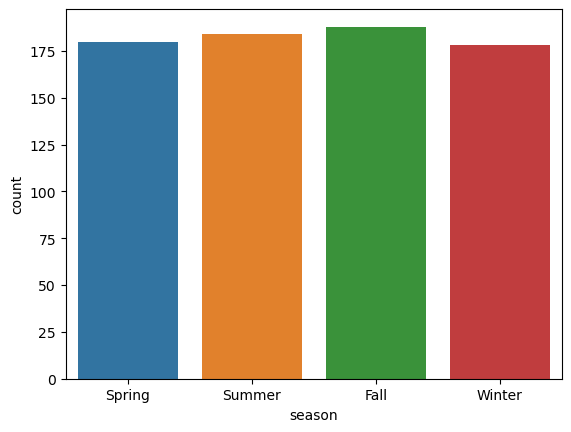

In [23]:
for i in num_cols:
    sns.histplot(x=df[i])
    plt.show()
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

### Bivariate Analysis

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


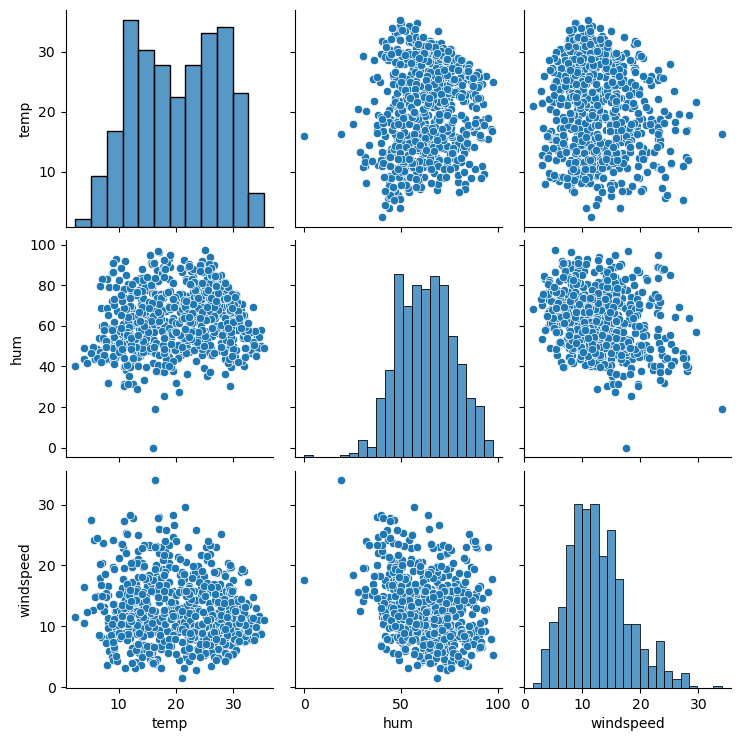

In [25]:
# Pair plot for all the num columns
sns.pairplot(df[num_cols])
plt.show()

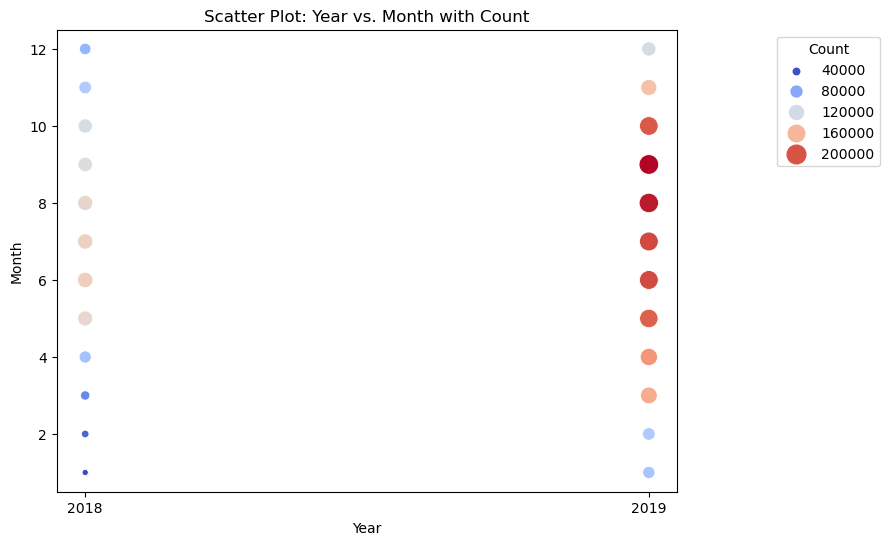

In [26]:
# Group by year and month, summing the 'cnt' values
grouped_df = df.groupby(['yr', 'mnth'], as_index=False).sum()
# Now plot the grouped data
plt.figure(figsize=(8,6))
sns.scatterplot(x='yr', y='mnth', size='cnt', data=grouped_df, hue='cnt', palette='coolwarm', sizes=(20, 200))
plt.title('Scatter Plot: Year vs. Month with Count')
plt.xlabel('Year')
plt.ylabel('Month')
plt.legend(loc='upper left', bbox_to_anchor=(1.15, 1), title="Count")
plt.ylim(0.5, 12.5)
# Rotate the x-axis labels (year) by 90 degrees
# plt.xticks(rotation=90)

plt.show()

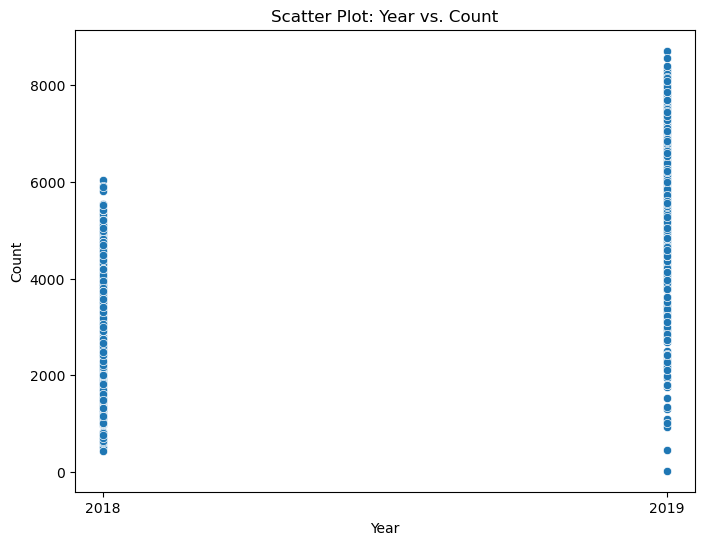

In [27]:
# Scatter plot between '2018' and '2019'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='yr', y='cnt', data=df)
plt.title('Scatter Plot: Year vs. Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

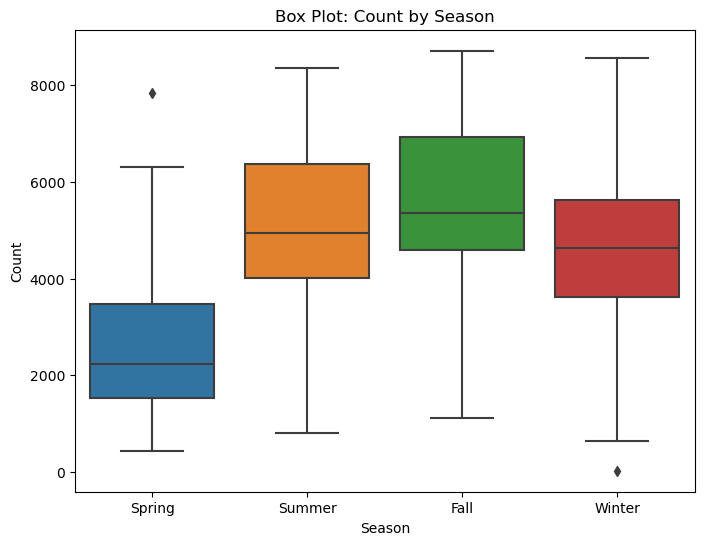

In [28]:
# Box plot for 'cnt' across different seasons
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Box Plot: Count by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

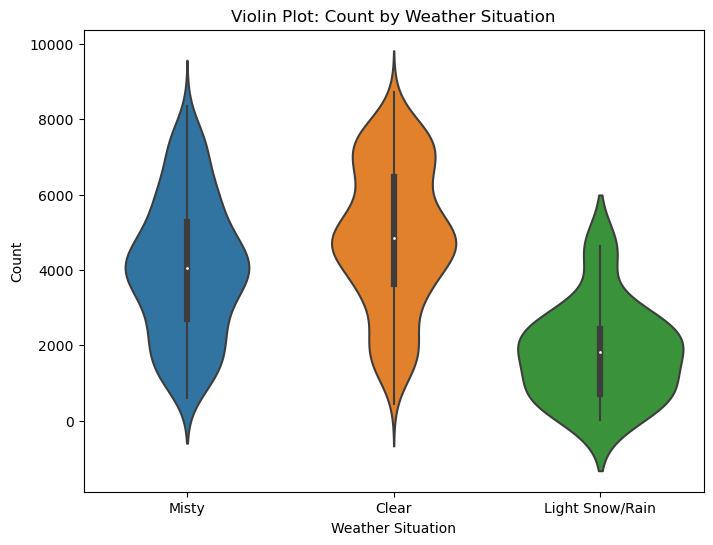

In [29]:
# violinplot for 'cnt' across different Weather
plt.figure(figsize=(8, 6))
sns.violinplot(x='weathersit', y='cnt', data=df)
plt.title('Violin Plot: Count by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.show()

### Multivariate Analysis

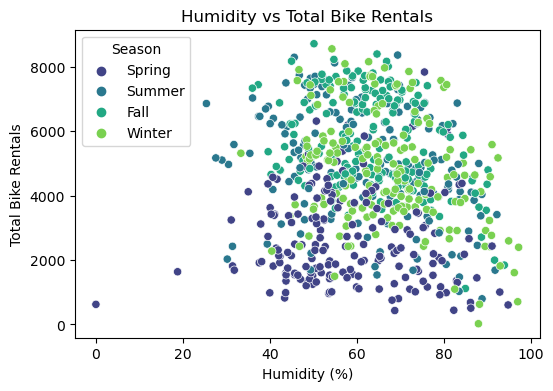

In [31]:
# Scatter plot of humidity vs total bike rentals
plt.figure(figsize=(6,4))
sns.scatterplot(x='hum', y='cnt', data=df, hue='season', palette='viridis')
plt.title('Humidity vs Total Bike Rentals')
plt.xlabel('Humidity (%)')
plt.ylabel('Total Bike Rentals')
plt.legend(title='Season')
plt.show()

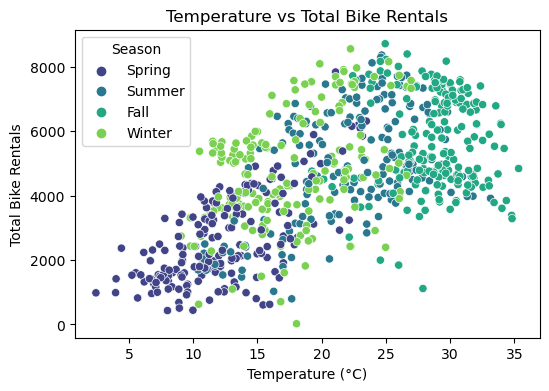

In [32]:
# Scatter plot of temp vs total bike rentals
plt.figure(figsize=(6,4))
sns.scatterplot(x='temp', y='cnt', data=df, hue='season', palette='viridis')
plt.title('Temperature vs Total Bike Rentals')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Bike Rentals')
plt.legend(title='Season')
plt.show()

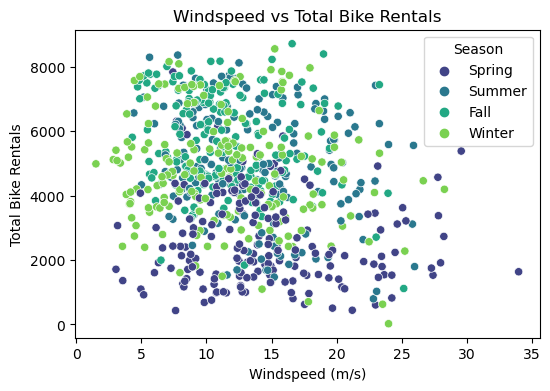

In [33]:
# Scatter plot of windspeed vs total bike rentals
plt.figure(figsize=(6,4))
sns.scatterplot(x='windspeed', y='cnt', data=df, hue='season', palette='viridis')
plt.title('Windspeed vs Total Bike Rentals')
plt.xlabel('Windspeed (m/s)')
plt.ylabel('Total Bike Rentals')
plt.legend(title='Season')
plt.show()

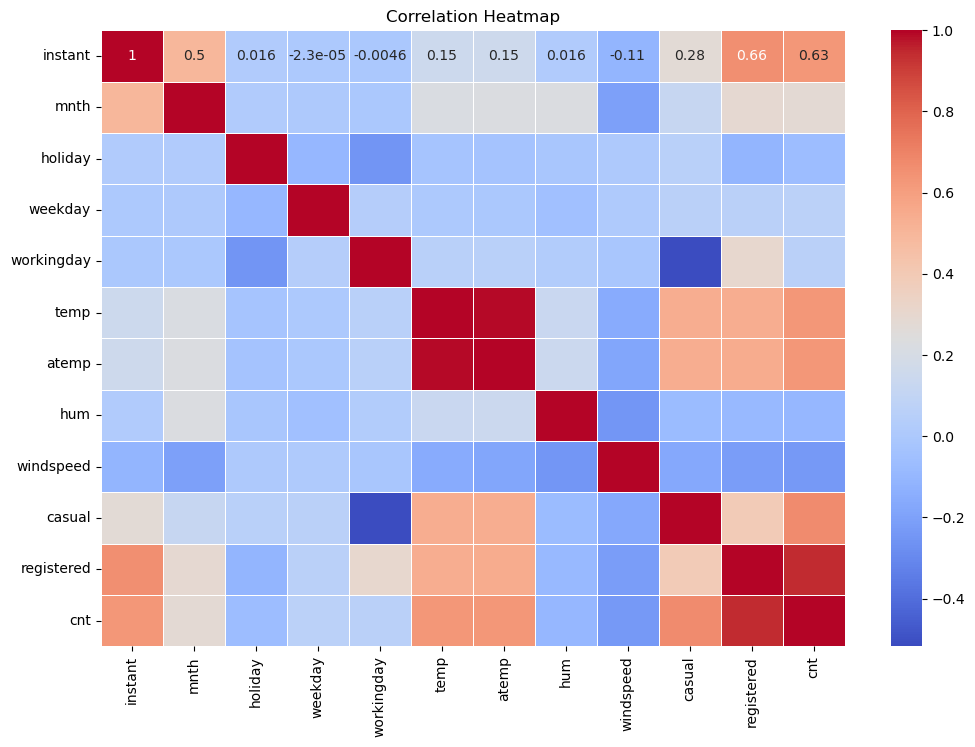

In [34]:
# Selected only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
correlation_matrix = numeric_df.corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


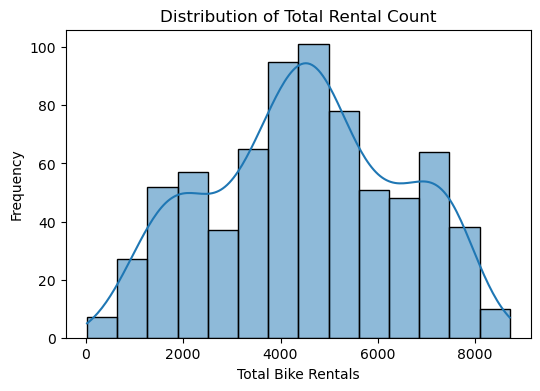

In [35]:
# Plot the distribution of the 'cnt' variable
plt.figure(figsize=(6,4))
sns.histplot(df['cnt'], kde=True)
plt.title('Distribution of Total Rental Count')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.show()

# 4. Data Preprocessing

In [37]:
# Drop Unnecessary Columns

In [38]:
df = df.drop(columns=['casual', 'registered','dteday'])

In [39]:
# Convert Categorical Variables to Dummy Variables:

In [40]:
df = pd.get_dummies(df, columns=['weathersit', 'season'], drop_first=True)

# 5. Feature Scaling

In [42]:
scaler = StandardScaler()
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 6. Split the Dataset

In [44]:
# The model should be built taking this 'cnt' as the target variable.
X = df.drop(columns=['cnt'])
y = df['cnt']

In [45]:
# Train-Test Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,weathersit_Light Snow/Rain,weathersit_Misty,season_Spring,season_Summer,season_Winter
247,248,2018,9,1,1,0,0.971447,0.927715,1.143992,0.286389,False,True,False,False,False
335,336,2018,12,0,5,1,-0.991579,-0.878443,-0.012783,-1.158085,False,False,False,False,True
702,703,2019,12,0,2,1,-0.107991,-0.033595,0.745709,-0.211271,False,False,False,False,True
440,441,2019,3,0,6,0,0.101524,0.187358,0.900919,-1.029692,False,True,True,False,False
136,137,2018,5,0,2,1,0.361135,0.392908,1.477844,1.120721,False,True,False,True,False


In [48]:
y_train.head()

247    3351
335    3940
702    6606
440    7836
136    4123
Name: cnt, dtype: int64

# 7. Model Building

In [50]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Random Forest Model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# 8. Model Evaluation

In [52]:
# Make Predictions on Test Set

In [53]:
# Evaluate Models Using R-squared:

In [54]:
print('Linear Regression Model')
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
y_pred_linear1 = linear_model.predict(X_train)
r2_linear1 = r2_score(y_train, y_pred_linear1)
print('Train', r2_linear1 , 'Test:' , r2_linear)

print('\nRandom Forest Model')
y_pred_rf = random_forest_model.predict(X_test)
y_pred_rf1 = random_forest_model.predict(X_train)
r2_rf = r2_score(y_test, y_pred_rf)
r2_rf1 = r2_score(y_train, y_pred_rf1)
print('Train', r2_rf1 , 'Test:' , r2_rf)

Linear Regression Model
Train 0.8224006489617843 Test: 0.8530642624330174

Random Forest Model
Train 0.9823200790915572 Test: 0.9239827007425345


# 9. Residual Analysis

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


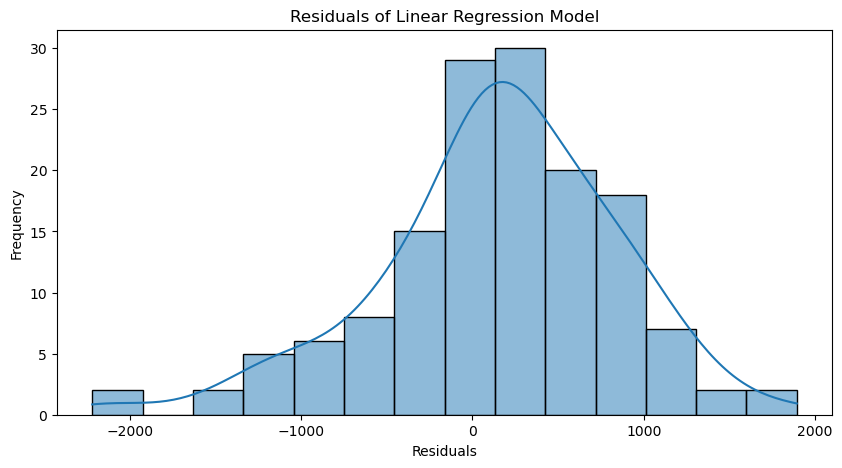

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


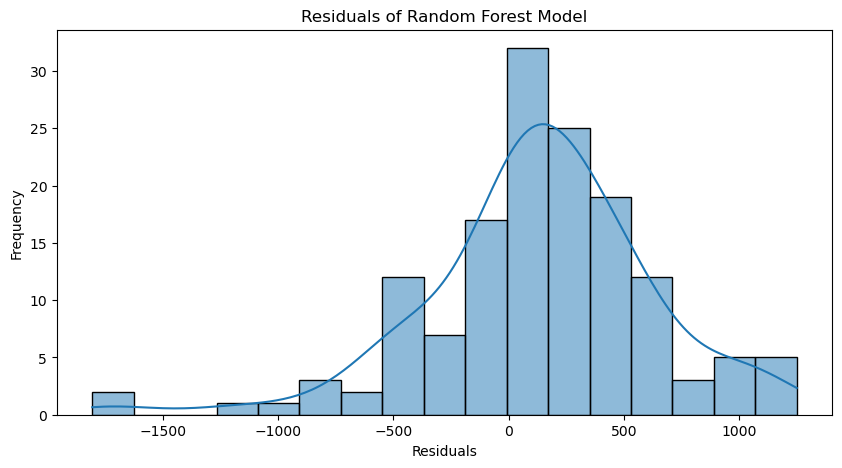

In [56]:
# Residuals for linear regression
residuals_linear = y_test - y_pred_linear
plt.figure(figsize=(10, 5))
sns.histplot(residuals_linear, kde=True)
plt.title('Residuals of Linear Regression Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residuals for random forest
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 5))
sns.histplot(residuals_rf, kde=True)
plt.title('Residuals of Random Forest Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 10. Interpretation

### Coefficients for Linear Regression

In [59]:
feature_names = X.columns
coefficients = linear_model.coef_
linear_model_summary = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(linear_model_summary.sort_values(by='Coefficient', ascending=False))

                       Feature  Coefficient
1                           yr  4485.130389
6                         temp   814.380634
14               season_Winter   802.386770
13               season_Summer   240.756390
2                         mnth   179.150986
5                   workingday   138.108297
7                        atemp   121.019057
4                      weekday    68.068672
0                      instant    -6.838511
8                          hum  -142.545985
9                    windspeed  -217.194969
11            weathersit_Misty  -448.243665
3                      holiday  -497.998116
12               season_Spring  -976.521706
10  weathersit_Light Snow/Rain -2094.480805


### Feature Importances for Random Forest

In [61]:
feature_importances = random_forest_model.feature_importances_
rf_model_summary = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(rf_model_summary.sort_values(by='Importance', ascending=False))

                       Feature  Importance
0                      instant    0.560103
6                         temp    0.172978
7                        atemp    0.117579
8                          hum    0.057933
9                    windspeed    0.031553
10  weathersit_Light Snow/Rain    0.018576
4                      weekday    0.012436
11            weathersit_Misty    0.006517
2                         mnth    0.005247
5                   workingday    0.005001
3                      holiday    0.004316
12               season_Spring    0.003900
14               season_Winter    0.002017
1                           yr    0.001020
13               season_Summer    0.000825


In [62]:
r2_test = r2_score(y_test, y_pred_linear)
print("Test:",round(r2_test,3))

Test: 0.853


# 11. Business Insights & Conclusion


### Yearly Trends:

The demand is increasing year over year, indicating a growing market. Continue investing in expanding the service and improving infrastructure.

### Seasonal and Weather-Based Promotions:

Temperature: Since higher temperatures are associated with higher demand, consider promoting bike rentals during warmer months. Implement discounts or special offers during colder months to balance demand.
Weather Conditions: Develop strategies to mitigate the impact of bad weather on bike rentals, such as offering discounts during light rain or snow.

### Operational Adjustments:

Working Days vs. Holidays: Higher demand on working days suggests focusing on ensuring sufficient bike availability during the weekdays. Conversely, consider special offers or activities to boost rentals on holidays.

### Humidity and Wind Speed: 

Since these negatively impact demand, consider providing weather-protective gear or improving bike design to handle such conditions better.

### Monthly and Weekly Patterns:

Analyze the demand patterns on a more granular level (e.g., specific months or days of the week) to optimize bike distribution and maintenance schedules accordingly.

### Conclusion

By understanding the significant factors and their impact on bike-sharing demand, BoomBikes can make informed decisions to optimize their operations, marketing strategies, and customer satisfaction. This comprehensive analysis provides actionable insights that can help the company adapt to market dynamics and enhance their service offerings.